In [20]:
# %load preload.py

from matplotlib import rc

import matplotlib.pyplot as plt
from numpy import *
from control import *
from scipy.linalg import *
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
# from sympy import Matrix, symbols, sin, cos, tan, asin, acos, atan, simplify
from scipy.integrate import solve_ivp

plt.rc('axes',axisbelow=True)
rc('text', usetex=True)
init_vprinting()


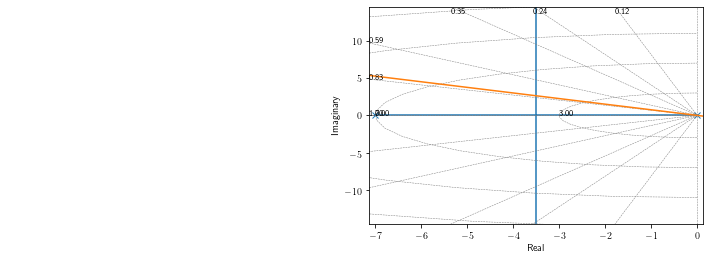

In [21]:
F = tf(6.7713,poly([0,-7]))
x = linspace(-10,10,10000)
r, k = root_locus(F)
damping_ratio = tan(pi-arccos(.7998396910782286)) * x
plt.plot(x, damping_ratio)
plt.savefig('root.png',dpi=600)

In [22]:
drline = asarray(x,dtype=complex)
drline.imag = damping_ratio

In [23]:
step_info(F)

{'RiseTime': 5.486486486486486,
 'SettlingTime': 6.866866866866867,
 'SettlingMin': 5.975636630508071,
 'SettlingMax': 6.633110204081629,
 'Overshoot': 0.0,
 'Undershoot': 0.0,
 'Peak': 6.633110204081629,
 'PeakTime': 7.0,
 'SteadyStateValue': 6.633110204081629}

In [165]:
import numpy as np
from scipy.signal import butter,filtfilt
import plotly.graph_objects as go

# Filter requirements.
fs = 50.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic

data1 = np.loadtxt('data_1.csv',delimiter=',')
t_samp2, data_in2, data_out2 = np.loadtxt('data_2.csv',delimiter=',').T

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(y=data1, name='signal with noise'))
fig.add_trace(go.Scatter(y=y, name='filtered signal'))
fig.show()

In [144]:
fig = go.Figure()
a = data_out2-data_in2
fig.add_trace(go.Scatter(x=t_samp2, y=data_in2, name='input signal'))
fig.add_trace(go.Scatter(x=t_samp2, y=data_out2, name='output signal'))
# plt.plot(t_samp2, data_out2)
# plt.plot(t_samp2, data_in2)
# fig.add_trace(go.Scatter(x=t_samp2, y=(data_out2+data_in2)/2, name='mean signal'))
fig.add_trace(go.Scatter(x=t_samp2, y=data_out2-data_in2, name='difference signal'))
# fig.add_trace(go.Scatter(x=t_samp2, y=np.mean(a)*np.ones(len(t_samp2)), name='mean difference'))
cond1 = np.where((0.2<t_samp2) & (t_samp2<1.2))[0]
cond2 = np.where((1.2<t_samp2) & (t_samp2<2.2))[0]
mina, maxa = np.min(a[cond1]), np.max(a[cond1])
minb, maxb = np.min(a[cond2]), np.max(a[cond2])
A = abs(mina- maxa)/2
meana = (mina+maxa)/2
meanb = (minb+maxb)/2
meana = np.where(abs(meana-a[cond1])<1e-2)[0]
meanb = np.where(abs(meanb-a[cond2])<1e-2)[0]
ta = t_samp2[20+meana]
tb = t_samp2[120+meanb]
sa, sb = a[np.where(ta==t_samp2)], a[np.where(tb==t_samp2)]
sa,sb,ta,tb
kd = (sa-sb)/(ta-tb)
cd = sb-kd*tb
fig.add_trace(go.Scatter(x=t_samp2, y=a-(kd*t_samp2+cd), name='slope'))
fig.show()
# np.arctan(k)*180/np.pi

In [147]:
cond1

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119])

In [168]:
fig = go.Figure()
a = data_in2
cond1 = np.where((0<t_samp2) & (t_samp2<1))[0]
cond2 = np.where((1<t_samp2) & (t_samp2<2))[0]
mina, maxa = np.min(a[cond1]), np.max(a[cond1])
minb, maxb = np.min(a[cond2]), np.max(a[cond2])
A = abs(mina- maxa)/2
meana = (mina+maxa)/2
meanb = (minb+maxb)/2
meana = min(np.where(abs(meana-a[cond1])<1e-2)[0])
meanb = min(np.where(abs(meanb-a[cond2])<1e-2)[0])
ta = t_samp2[min(cond1)+meana]
tb = t_samp2[min(cond2)+meanb]
sa, sb = a[np.where(ta==t_samp2)], a[np.where(tb==t_samp2)]
sa,sb,ta,tb
kd = (sa-sb)/(ta-tb)
cd = sb-kd*tb
fig.add_trace(go.Scatter(x=t_samp2, y=data_in2, name='input signal'))
fig.add_trace(go.Scatter(x=t_samp2, y=a-(kd*t_samp2), name='modified input signal'))

a = data_out2
cond1 = np.where((0<t_samp2) & (t_samp2<1))[0]
cond2 = np.where((1<t_samp2) & (t_samp2<2))[0]
mina, maxa = np.min(a[cond1]), np.max(a[cond1])
minb, maxb = np.min(a[cond2]), np.max(a[cond2])
A = abs(mina- maxa)/2
meana = (mina+maxa)/2
meanb = (minb+maxb)/2
meana = min(np.where(abs(meana-a[cond1])<1e-2)[0])
meanb = min(np.where(abs(meanb-a[cond2])<1e-2)[0])
ta = t_samp2[min(cond1)+meana]
tb = t_samp2[min(cond2)+meanb]
sa, sb = a[np.where(ta==t_samp2)], a[np.where(tb==t_samp2)]
kd = (sa-sb)/(ta-tb)
cd = sb-kd*tb
fig.add_trace(go.Scatter(x=t_samp2, y=data_out2, name='output signal'))
fig.add_trace(go.Scatter(x=t_samp2, y=(kd*t_samp2+cd), name='modified output signal'))
# print(ta,sa,tb,sb)
fig.show()

In [152]:
min(np.where(abs(meana-a[cond1])<1e-2)[0])

ValueError: min() arg is an empty sequence